Creates Figure 6-10 based on the .txt runtime info files returned by the ODE-Test

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import seaborn

from matplotlib import rc

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
rc('font', **font)


In [2]:
#global variables
#sleepvar is the variance of the idle time
nodelist=np.array([1,2,4,8,16])
workers_per_node = 48

datalist=[]
sleepvar=2

filepath="/home/felipe/testresults/ODE/Juwels/Var"+str(sleepvar)


#Read in files
for i in range(len(nodelist)):
    datalist.append(pd.read_csv(
        os.path.join(filepath, "sleeptimeresults"+str(nodelist[i])+".txt"),
        delimiter = ", ", engine = 'python'))

data1worker=pd.read_csv(os.path.join(filepath, "sleeptimeresults0.txt"), delimiter = ", ", engine = 'python')
    
pop_sizes = datalist[0].loc[datalist[0]['Look_ahead']=='PPP']['Pop size'].values
print(pop_sizes)
meanslist = []

for i in range(len(nodelist)):
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='PPP']['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
    #meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)


nodelist = nodelist * 48

[  64  256 1024 4096]


In [3]:
#Turn them into arrays (rows correspond to same number of workers)
PPParray=np.zeros((len(nodelist),len(pop_sizes)))
ORIarray=np.zeros((len(nodelist),len(pop_sizes)))
#Statarray=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(len(nodelist)):
    PPParray[i,:]=meanslist[2*i]
    ORIarray[i,:]=meanslist[2*i+1]
 #   Statarray[i,:]=meanslist[3*i+2]
    


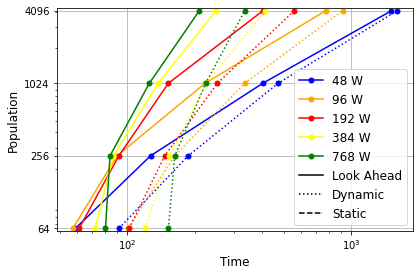

In [4]:
#plot not used
colors=["blue", "orange" ,"red", "yellow", "green", "purple"]

#plt.plot(PPParray[0,:],pop_sizes,label=str(nodes[0])+" Cores", marker="o", markersize=5, color=colors[0])

for i in range(0,len(nodelist)):
    plt.plot(PPParray[i,:],pop_sizes,label=str(nodelist[i])+" W", marker="o", markersize=5, color=colors[i])
    plt.plot(ORIarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dotted")
    #plt.plot(Statarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dashed")

plt.plot([0],[10], label="Look Ahead", color = "black")

plt.plot([0],[10], label="Dynamic", color = "black", linestyle = "dotted")

plt.plot([0],[10], label="Static", color = "black", linestyle = "dashed")
    
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.ylabel("Population")
plt.yticks(pop_sizes,pop_sizes)
plt.xscale('log')
plt.xlabel("Time")
plt.ylim(0.95*pop_sizes[0],1.05*pop_sizes[-1])
plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()

plt.savefig("/home/felipe/MTGraphics/ODE/Var"+str(sleepvar)+"/Cores_PopRuntimeVar"+str(sleepvar)+".pdf")
plt.show()

Here we calculate the parallel efficiencies as runtime(1 worker)/ (W runtime(W workers))

In [5]:
pop_sizes_1=pop_sizes[0:-1]

means1PPP = data1worker.loc[data1worker['Look_ahead']=='PPP']['Runtime Expectation'].values
means1PPP = np.append(means1PPP, 4*means1PPP[-1])

par_efficiency=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency[i,j]=means1PPP[j]/(PPParray[i,j]*nodelist[i])

par_efficiency_ori=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_ori[i,j]=means1PPP[j]/(ORIarray[i,j]*nodelist[i])
        
"""
par_efficiency_stat=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_stat[i,j]=means1PPP[j]/(Statarray[i,j]*nodelist[i]*workers_per_node)
"""
"""
print(PPParray)
print(means1PPP)
print(par_efficiency)
"""

'\nprint(PPParray)\nprint(means1PPP)\nprint(par_efficiency)\n'

<ipython-input-6-9540d099da8d>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


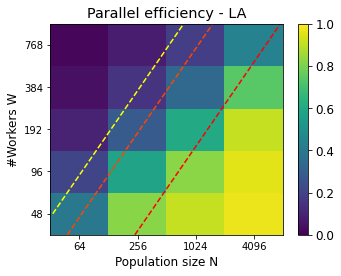

In [6]:
#Creation of Fig 7 and 10b

y = np.array([math.sqrt(2),2,4,8,16,32])*48
y1=np.append(48,y)
y2=y1[:]

kekse=np.zeros((len(nodelist)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency
fig, ax = plt.subplots(1,1,figsize=(5,4))
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   kekse, vmin=0, vmax=1)
fig.colorbar(im)

plt.plot(y,y, color="yellow", linestyle="dashed", label="N=W")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="N=2W")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="N=10W")
plt.xscale('log')
plt.xlabel("Population size N")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("#Workers W")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
ax.axis('tight')
plt.title('Parallel efficiency - LA')
plt.xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()

plt.savefig("/home/felipe/MTGraphics/ODE/Var"+str(sleepvar)+"/PPPParallelEffVar"+str(sleepvar)+".pdf")
plt.show()

<ipython-input-7-09bf4f60aaef>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


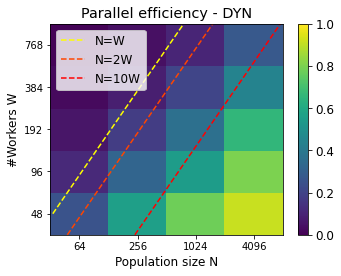

In [7]:
#Creation of Fig 6 and 10a

y = np.array([math.sqrt(2),2,4,8,16,32])*48
y1=np.append(48,y)
y2=y1[:]

kekse=np.zeros((len(nodelist)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency_ori
fig, ax = plt.subplots(1,1,figsize=(5,4))
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   kekse, vmin=0, vmax=1)
fig.colorbar(im)

plt.plot(y,y, color="yellow", linestyle="dashed", label="N=W")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="N=2W")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="N=10W")
plt.xscale('log')
plt.legend(loc = 'upper left')
plt.xlabel("Population size N")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("#Workers W")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
ax.axis('tight')
plt.title('Parallel efficiency - DYN')
plt.xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()

plt.savefig("/home/felipe/MTGraphics/ODE/Var"+str(sleepvar)+"/DYNParallelEffVar"+str(sleepvar)+".pdf")
plt.show()

<ipython-input-8-a11d9a145b6f>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


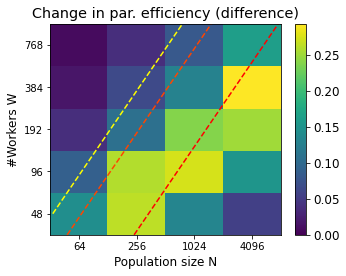

In [8]:
#Creation of Fig 8

vmax=None

diff = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
diff[:-1,:-1] = par_efficiency-par_efficiency_ori

fig, ax = plt.subplots(1,1, figsize=(5,4))
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   diff, vmin=0, vmax=vmax)
fig.colorbar(im)

plt.plot(y,y, color="yellow", linestyle="dashed", label="Pop=Nodes")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Nodes")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Nodes")
plt.xscale('log')
plt.xlabel("Population size N")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("#Workers W")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
plt.title('Change in par. efficiency (difference)')
plt.xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()
plt.savefig("/home/felipe/MTGraphics/ODE/Var"+str(sleepvar)+"/ChangeinParEffVar"+str(sleepvar)+".pdf")
plt.show()

<ipython-input-9-90866e07baa1>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),


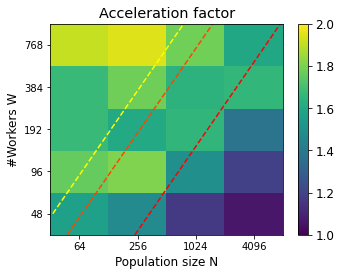

In [9]:
#Creation of Fig 9 and 10c

vmax=2

frac = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
frac[:-1,:-1] = par_efficiency/par_efficiency_ori
fig, ax = plt.subplots(1,1, figsize=(5,4))
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   frac, vmin=1, vmax=vmax)
fig.colorbar(im)
plt.plot(y,y, color="yellow", linestyle="dashed", label="Pop=Workers")
plt.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Workers")
plt.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Workers")
plt.xscale('log')
plt.xlabel("Population size N")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("#Workers W")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
plt.title('Acceleration factor')
plt.xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)
fig.tight_layout()

plt.savefig("/home/felipe/MTGraphics/ODE/Var"+str(sleepvar)+"/ODEAccelerationFactVar"+str(sleepvar)+".pdf")
plt.show()

<ipython-input-10-5d840325642b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
<ipython-input-10-5d840325642b>:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
<ipython-input-10-5d840325642b>:110: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dim

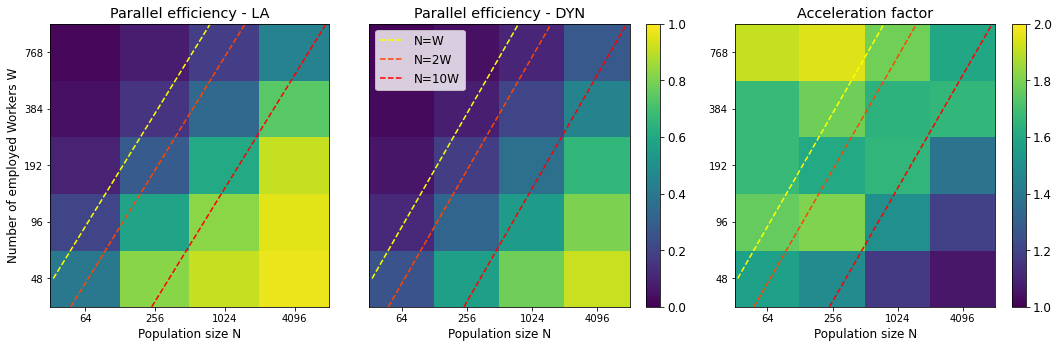

In [10]:
#Creation of Fig 7 and 10b
fig, axes = plt.subplots(1,3,figsize=(15,5),
                         gridspec_kw={'width_ratios': [1,1+1/6,1+1/6]})

#_______________________________
ax=axes[0]
y = np.array([math.sqrt(2),2,4,8,16,32])*48
y1=np.append(48,y)
y2=y1[:]

kekse=np.zeros((len(nodelist)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency

im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   kekse, vmin=0, vmax=1)
#fig.colorbar(im, ax=ax)

ax.plot(y,y, color="yellow", linestyle="dashed", label="N=W")
ax.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="N=2W")
ax.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="N=10W")
ax.set_xscale('log')
ax.set_xlabel("Population size N")
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
ax.set_xticks(tick_locs_x)
ax.set_xticklabels(pop_sizes)

ax.set_yscale('log')
ax.set_ylabel("Number of employed Workers W")
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticks(math.sqrt(2)*nodelist)
ax.set_yticklabels(nodelist)
ax.axis('tight')
ax.set_title('Parallel efficiency - LA')
ax.set_xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)


#_______________________________
ax=axes[1]

y = np.array([math.sqrt(2),2,4,8,16,32])*48
y1=np.append(48,y)
y2=y1[:]

kekse=np.zeros((len(nodelist)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency_ori

im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   kekse, vmin=0, vmax=1)
fig.colorbar(im, ax=ax)

ax.plot(y,y, color="yellow", linestyle="dashed", label="N=W")
ax.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="N=2W")
ax.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="N=10W")
ax.set_xscale('log')
ax.legend(loc = 'upper left')
ax.set_xlabel("Population size N")
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
ax.set_xticks(tick_locs_x)
ax.set_xticklabels(pop_sizes)

ax.set_yscale('log')
#ax.set_ylabel("#Workers W")
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticks([])
#ax.set_yticklabels(nodelist)

ax.axis('tight')
ax.set_title('Parallel efficiency - DYN')
ax.set_xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)

#________________________________________

#Creation of Fig 9 and 10c
ax=axes[2]

vmax=2

frac = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
frac[:-1,:-1] = par_efficiency/par_efficiency_ori
im = ax.pcolormesh(np.append(pop_sizes,4*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),
                   frac, vmin=1, vmax=vmax)
fig.colorbar(im, ax=ax)
ax.plot(y,y, color="yellow", linestyle="dashed", label="Pop=Workers")
ax.plot(2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Workers")
ax.plot(10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Workers")
ax.set_xscale('log')
ax.set_xlabel("Population size N")
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=2*pop_sizes[-1]
ax.set_xticks(tick_locs_x)
ax.set_xticklabels(pop_sizes)

ax.set_yscale('log')
#ax.set_ylabel("#Workers W")
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticks(math.sqrt(2)*nodelist)
ax.set_yticklabels(nodelist)

ax.set_title('Acceleration factor')
ax.set_xlim(xmin=64,xmax=16384)
ax.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()

plt.savefig("/home/felipe/lookahead-study/Models/T1_ODE/Figures/ODEFig4Var"+str(sleepvar)+".pdf")
plt.show()